# Structure of Long Short-Term Memory (LSTM)

# Training LSTM Neural Network

In [1]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

In [3]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [4]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [8]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100


2023-03-05 15:37:26.054473: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


313/313 [==============================] - 5s 14ms/step - loss: 0.6925 - accuracy: 0.5466 - val_loss: 0.6919 - val_accuracy: 0.5770
Epoch 2/100
313/313 [==============================] - 4s 13ms/step - loss: 0.6906 - accuracy: 0.6026 - val_loss: 0.6895 - val_accuracy: 0.6020
Epoch 3/100
313/313 [==============================] - 4s 14ms/step - loss: 0.6866 - accuracy: 0.6224 - val_loss: 0.6844 - val_accuracy: 0.6206
Epoch 4/100
313/313 [==============================] - 4s 13ms/step - loss: 0.6760 - accuracy: 0.6335 - val_loss: 0.6677 - val_accuracy: 0.6102
Epoch 5/100
313/313 [==============================] - 4s 13ms/step - loss: 0.6368 - accuracy: 0.6862 - val_loss: 0.6123 - val_accuracy: 0.7304
Epoch 6/100
313/313 [==============================] - 4s 13ms/step - loss: 0.5915 - accuracy: 0.7388 - val_loss: 0.5867 - val_accuracy: 0.7372
Epoch 7/100
313/313 [==============================] - 4s 13ms/step - loss: 0.5694 - accuracy: 0.7529 - val_loss: 0.5676 - val_accuracy: 0.7514
Epoc

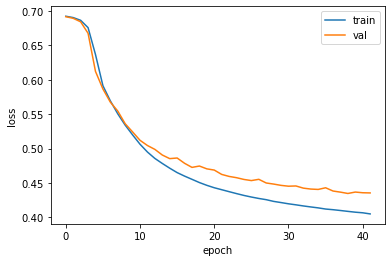

In [10]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# Apply Dropout to RNN

In [11]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [13]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model2.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 5s 15ms/step - loss: 0.6924 - accuracy: 0.5325 - val_loss: 0.6915 - val_accuracy: 0.5770
Epoch 2/100
313/313 [==============================] - 4s 13ms/step - loss: 0.6898 - accuracy: 0.5942 - val_loss: 0.6873 - val_accuracy: 0.6342
Epoch 3/100
313/313 [==============================] - 4s 13ms/step - loss: 0.6773 - accuracy: 0.6240 - val_loss: 0.6564 - val_accuracy: 0.6310
Epoch 4/100
313/313 [==============================] - 4s 13ms/step - loss: 0.6182 - accuracy: 0.7055 - val_loss: 0.6006 - val_accuracy: 0.7356
Epoch 5/100
313/313 [==============================] - 4s 14ms/step - loss: 0.5896 - accuracy: 0.7367 - val_loss: 0.5818 - val_accuracy: 0.7452
Epoch 6/100
313/313 [==============================] - 4s 14ms/step - loss: 0.5729 - accuracy: 0.7466 - val_loss: 0.5662 - val_accuracy: 0.7530
Epoch 7/100
313/313 [==============================] - 4s 14ms/step - loss: 0.5585 - accuracy: 0.7554 - val_loss: 0.5538 - val_accuracy:

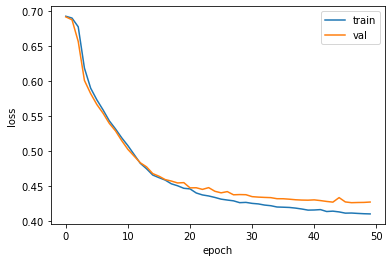

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# Connect Two Layers

In [16]:
model3 = keras.Sequential()
model3.add(keras.layers.Embedding(500, 16, input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

In [17]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_2 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_3 (LSTM)               (None, 8)                 544       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


In [20]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model3.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 9s 26ms/step - loss: 0.6929 - accuracy: 0.5243 - val_loss: 0.6923 - val_accuracy: 0.5402
Epoch 2/100
313/313 [==============================] - 8s 25ms/step - loss: 0.6896 - accuracy: 0.5680 - val_loss: 0.6845 - val_accuracy: 0.6606
Epoch 3/100
313/313 [==============================] - 8s 25ms/step - loss: 0.6588 - accuracy: 0.6737 - val_loss: 0.6183 - val_accuracy: 0.7120
Epoch 4/100
313/313 [==============================] - 8s 25ms/step - loss: 0.5788 - accuracy: 0.7240 - val_loss: 0.5527 - val_accuracy: 0.7362
Epoch 5/100
313/313 [==============================] - 8s 25ms/step - loss: 0.5375 - accuracy: 0.7443 - val_loss: 0.5263 - val_accuracy: 0.7496
Epoch 6/100
313/313 [==============================] - 8s 25ms/step - loss: 0.5166 - accuracy: 0.7551 - val_loss: 0.5060 - val_accuracy: 0.7564
Epoch 7/100
313/313 [==============================] - 8s 25ms/step - loss: 0.5000 - accuracy: 0.7676 - val_loss: 0.4924 - val_accuracy:

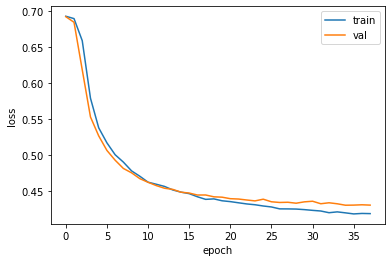

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# Training GRU Neural Network

In [23]:
model4 = keras.Sequential()
model4.add(keras.layers.Embedding(500, 16, input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation='sigmoid'))

In [24]:
model4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 16)           8000      
                                                                 
 gru (GRU)                   (None, 8)                 624       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,633
Trainable params: 8,633
Non-trainable params: 0
_________________________________________________________________


In [25]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model4.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 5s 15ms/step - loss: 0.6921 - accuracy: 0.5314 - val_loss: 0.6910 - val_accuracy: 0.5570
Epoch 2/100
313/313 [==============================] - 5s 14ms/step - loss: 0.6896 - accuracy: 0.5860 - val_loss: 0.6881 - val_accuracy: 0.5920
Epoch 3/100
313/313 [==============================] - 4s 14ms/step - loss: 0.6852 - accuracy: 0.6130 - val_loss: 0.6828 - val_accuracy: 0.6114
Epoch 4/100
313/313 [==============================] - 4s 14ms/step - loss: 0.6775 - accuracy: 0.6302 - val_loss: 0.6736 - val_accuracy: 0.6258
Epoch 5/100
313/313 [==============================] - 5s 14ms/step - loss: 0.6643 - accuracy: 0.6477 - val_loss: 0.6579 - val_accuracy: 0.6444
Epoch 6/100
313/313 [==============================] - 5s 15ms/step - loss: 0.6415 - accuracy: 0.6686 - val_loss: 0.6294 - val_accuracy: 0.6676
Epoch 7/100
313/313 [==============================] - 5s 15ms/step - loss: 0.5967 - accuracy: 0.7028 - val_loss: 0.5693 - val_accuracy:

313/313 [==============================] - 5s 15ms/step - loss: 0.4063 - accuracy: 0.8171 - val_loss: 0.4351 - val_accuracy: 0.8002
Epoch 58/100
313/313 [==============================] - 4s 14ms/step - loss: 0.4065 - accuracy: 0.8183 - val_loss: 0.4326 - val_accuracy: 0.8024
Epoch 59/100
313/313 [==============================] - 4s 14ms/step - loss: 0.4056 - accuracy: 0.8183 - val_loss: 0.4329 - val_accuracy: 0.8000
Epoch 60/100
313/313 [==============================] - 4s 14ms/step - loss: 0.4058 - accuracy: 0.8184 - val_loss: 0.4320 - val_accuracy: 0.8034
Epoch 61/100
313/313 [==============================] - 4s 14ms/step - loss: 0.4054 - accuracy: 0.8174 - val_loss: 0.4317 - val_accuracy: 0.8034
Epoch 62/100
313/313 [==============================] - 5s 15ms/step - loss: 0.4047 - accuracy: 0.8189 - val_loss: 0.4320 - val_accuracy: 0.8020
Epoch 63/100
313/313 [==============================] - 4s 14ms/step - loss: 0.4046 - accuracy: 0.8188 - val_loss: 0.4357 - val_accuracy: 0.796

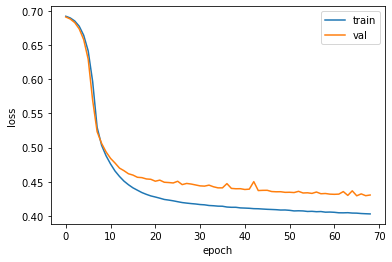

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [27]:
test_seq = pad_sequences(test_input, maxlen=100)
rnn_model = keras.models.load_model('best-2rnn-model.h5')
rnn_model.evaluate(test_seq, test_target)

782/782 [==============================] - 3s 4ms/step - loss: 0.4256 - accuracy: 0.8000


[0.42559289932250977, 0.800000011920929]